In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 1 

Autosaving every 1 seconds




---



In [2]:
df = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv',encoding='latin-1')
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04




---



In [3]:
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')



---



What is the total sum of Animal Fat produced in 2014 and 2017 respectively?

In [4]:
pivote_2014_2017 =df.pivot_table(index=['Item'],values =['Y2014','Y2017'],aggfunc='sum')
list(pivote_2014_2017.index)

['Alcohol, Non-Food',
 'Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Apples and products',
 'Aquatic Animals, Others',
 'Aquatic Plants',
 'Aquatic Products, Other',
 'Bananas',
 'Barley and products',
 'Beans',
 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Bovine Meat',
 'Butter, Ghee',
 'Cassava and products',
 'Cephalopods',
 'Cereals - Excluding Beer',
 'Cereals, Other',
 'Citrus, Other',
 'Cloves',
 'Cocoa Beans and products',
 'Coconut Oil',
 'Coconuts - Incl Copra',
 'Coffee and products',
 'Cottonseed',
 'Cottonseed Oil',
 'Cream',
 'Crustaceans',
 'Dates',
 'Demersal Fish',
 'Eggs',
 'Fats, Animals, Raw',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Fish, Seafood',
 'Freshwater Fish',
 'Fruits - Excluding Wine',
 'Fruits, Other',
 'Grand Total',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Groundnut Oil',
 'Groundnuts (Shelled Eq)',
 'Honey',
 'Infant food',
 'Lemons, Limes and products',
 'Maize Germ Oil',
 'Maize and products',


In [5]:
pivote_2014_2017.loc['Animal fats']

Y2014    209460.54
Y2017    269617.53
Name: Animal fats, dtype: float64



---



What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

In [6]:
print(f"The Mean for the year 2015 is {round(df['Y2015'].mean(),3)} and the standard deviation is {round(df['Y2015'].std(),3)}")

The Mean for the year 2015 is 135.236 and the standard deviation is 1603.404




---



What is the total number and percentage of missing data in 2016 to 2 decimal places?

In [7]:
print(f"The total number of missing data in year 2016 is {df['Y2016'].isnull().sum() } and the percentage is {round((df['Y2016'].isnull().sum()/len(df['Y2016'].isnull()))*100,2)} %")

The total number of missing data in year 2016 is 1535 and the percentage is 2.52 %




---



Which year had the highest correlation with ‘Element Code’? 

In [8]:
df.corr().sort_values('Element Code',ascending=False)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314


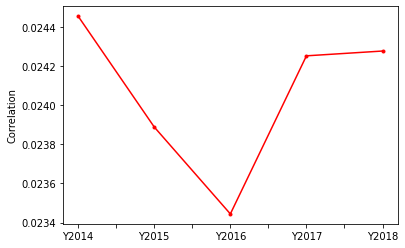

In [9]:
df.corr().loc['Element Code'][3:].plot(marker='.',color = 'red',ylabel='Correlation');

So here we can see that year 2014 has highest number of corelation



---



What year has the highest sum of Import Quantity?

In [10]:
pivote_table =df.pivot_table(index=['Element'],values =['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],aggfunc='sum')
pivote_table

,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10225.56,10235.74,10102.77,10253.84,10258.69
Feed,216927.89,225050.22,228958.65,223705.68,233489.68
Food,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,153223.00,155439.00,157787.00,160614.00,163902.00


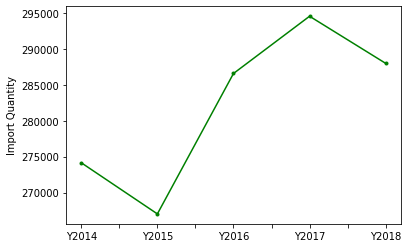

In [11]:
pivote_table.loc['Import Quantity'].plot(marker='.',color = 'green',ylabel='Import Quantity');

Year 2017 has the highest sum of import Quantity



---



What is the total number of the sum of Production in 2014?

In [12]:
print(f"The total number of the sum of  production in 2014 is {round(pivote_table.loc['Production'][0],2)}")

The total number of the sum of  production in 2014 is 1931287.75




---



Which of these elements had the highest sum in 2018?

Which of these elements had the 3rd lowest sum in 2018?

In [13]:
pivote_table.sort_values("Y2018",ascending=False)

,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Production,1931287.75,1947019.39,1943537.15,2030056.89,2075072.89
Food,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Total Population - Both sexes,1031585.00,1058081.00,1085107.00,1112641.00,1140605.00
Food supply (kcal/capita/day),454257.00,453383.00,451810.00,454681.00,455261.00
Processing,282923.00,287929.00,280631.00,292836.00,308429.00
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09
Feed,216927.89,225050.22,228958.65,223705.68,233489.68
Export Quantity,150020.64,157614.47,151920.46,182338.80,181594.80


Domestic supply quantity had the highest sum in 2018.

Protein supply quantity (g/capita/day) had the lowest sum in 2018 who comes at 3rd last position




---




What is the total Import Quantity in Algeria in 2018?

In [14]:
pivote_table_area =df.pivot_table(index=['Area','Element'],values =['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],aggfunc='sum')

In [15]:
pivote_table_area.loc['Algeria'].sort_values('Y2018',ascending=False).loc['Import Quantity']

Y2014    34940.12
Y2015    37841.91
Y2016    36736.08
Y2017    36059.29
Y2018    36238.29
Name: Import Quantity, dtype: float64

The total Import Quantities in Algeria in 2018 are 36238.29



---



What is the total number of unique countries in the dataset?

In [16]:
unique_countries = pd.unique(df["Area"]).shape[0]

In [17]:
print(f"The total number of unique countries in the dataset are { unique_countries }")

The total number of unique countries in the dataset are 49




---



---



Thank you for your time 

Akshay Satpute


ID: 147ccfd44e01f000